In [34]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

In [35]:
def plot_premium_bar(data, x='remained_time', y='remained_shares', name='1', max_time=5, max_share=6):
    """
    data: DataFrame, the data used to plot
    x: string, choose one feature as the x axis
    y: string, choose one feature as the y axis
    name: string, name label of the plot
    max_time: int, the maximum remaining time
    max_share: int, the maximum remaining share
    """
    
    data = data[data.remained_time != 0]
    data_to_plot = data.groupby([x, y], as_index=False).agg({'premium':['mean']})
    data_to_plot.columns = [''.join(x) for x in data_to_plot.columns.ravel()]
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    x_data = np.array(data_to_plot[x])
    y_data = np.array(data_to_plot[y])
    z_data = np.zeros(len(x_data))
    dx = 0.5*np.ones(len(x_data))
    dy = 0.5*np.ones(len(y_data))
    dz = np.array(data_to_plot.premiummean)
    
    ax.bar3d(x_data, y_data, z_data, dx, dy, dz, color='grey')
    ax.set_xlim(max_time+1,1)
    ax.set_ylim(max_share+0.5,0.5)
    ax.set_xticks(np.arange(1.25,max_time+1.25))
    ax.set_xticklabels(list(map(str, range(1, max_time+1))))
    ax.set_xlabel('Remained Time')
    ax.set_ylabel('Remained Shares')
    ax.set_zlabel('Premium')

    plt.show()
    fig.savefig('premium_bar_plot_' + name +'.png', dpi=200)
    plt.close(fig) 

def plot_premium_ts(data, name='1', max_time=5, max_share=6):
    """
    data: DataFrame, the data used to plot
    name: string, name label of the plot
    max_time: int, the maximum remaining time
    max_share: int, the maximum remaining share
    """
    
    trunc = list(data[data.remained_time == float(max_time)].index)
    xx = np.arange(0, len(data)+len(trunc))
    yy = np.array(data.premium)+0.01
    data_color = np.array(data.remained_shares)/max_share
    count = 0
    tick_pos = []
    for i in trunc:
        yy = np.insert(yy, i+count, 0)
        data_color = np.insert(data_color, i+count, 0)
        tick_pos.append(i+count)
        count += 1

    #print(tick_pos)
    tick_pos = [i for i in xx if i not in tick_pos ]
    #print(tick_pos)

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    my_cmap = plt.cm.get_cmap('GnBu')
    colors = my_cmap(data_color)

    ax.bar(xx, yy, color=colors)

    sm = ScalarMappable(cmap=my_cmap)
    sm.set_array([])

    cbar = plt.colorbar(sm)
    cbar.set_label('Remaining Shares', rotation=270,labelpad=25)
    cbar.set_ticks(np.arange(0,1.01,1/(max_share-1)))
    cbar.set_ticklabels(np.arange(1,max_share+1))
    ax.set_xlabel('Time Step (remaining time)')
    ax.set_ylabel('Premium')
    ax.set_xticks(tick_pos)
    ax.set_xticklabels(data.remained_time.map(int))
    ax.set_yticklabels([str(i)[0:4] for i in (ax.get_yticks()-0.01)])
    ax.set_ylim(0.005, ax.get_ylim()[1])

    plt.show()
    fig.savefig('premium_ts_plot_' + name +'.png', dpi=200)
    plt.close(fig)

In [71]:
data = pd.read_csv('itr_30.csv')
for i in range(31, 44):
    data1 = pd.read_csv('itr_'+str(i)+'.csv')
    data = pd.concat([data, data1], ignore_index=True)

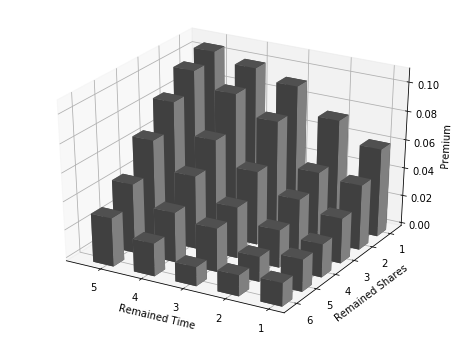

In [72]:
#data = pd.read_csv('itr_36.csv')
plot_premium_bar(data)

In [78]:
data = pd.read_csv('itr_25.csv')

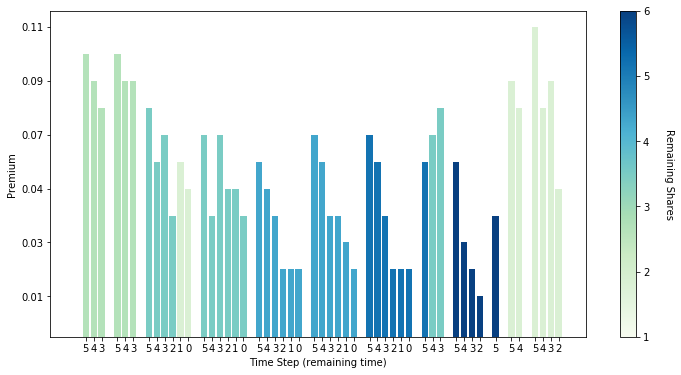

In [79]:
plot_premium_ts(data)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
#
# Assuming you have "2D" dataset like the following that you need
# to plot.
#
data_2d = [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            [11, 12, 13, 14, 15, 16, 17, 18 , 19, 20],
            [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
            [21, 22, 23, 24, 25, 26, 27, 28, 29, 30] ]
#
# Convert it into an numpy array.
#
data_array = np.array(data_2d)
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          0.5, 0.5, z_data, color='lightblue')

print(x_data.shape, y_data.shape, z_data.shape, np.zeros(len(z_data)).shape)
#
# Finally, display the plot.
#
plt.show()